# Data Prepping and EDA

### Pull in raw headline data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/combined_headlines_new.csv')

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data.head()

,date,headlines
0,2020-07-17,Jim Cramer : A better way to invest in the Cov...
1,2020-07-17,Cramer's lightning round : I would own Teradyne
2,2020-07-17,"Cramer's week ahead : Big week for earnings , ..."
3,2020-07-17,IQ Capital CEO Keith Bliss says tech and healt...
4,2020-07-16,Wall Street delivered the 'kind of pullback I'...


### Use yfinance to get SPY stock data

In [5]:
import yfinance as yf
from datetime import date, timedelta

def get_stock_data(ticker = 'SPY', start_date = (date.today() - timedelta(days=365)).strftime('%Y-%m-%d'), end_date = date.today().strftime('%Y-%m-%d')):
    # Load the stock data
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [6]:
start_date = pd.to_datetime(data['date'].iloc[-1]).strftime('%Y-%m-%d')
end_date = (pd.to_datetime(data['date'].iloc[0]) + timedelta(days=14)).strftime('%Y-%m-%d')
stock_data = get_stock_data('SPY',start_date=start_date, end_date=end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-20,270.940002,271.670013,270.179993,270.950012,244.474472,59757300
2018-03-21,270.899994,273.269989,270.190002,270.429993,244.005310,78709600
2018-03-22,267.910004,268.869995,263.359985,263.670013,237.905884,148785900
2018-03-23,264.170013,264.540009,257.829987,258.049988,232.835007,183534800
2018-03-26,262.130005,265.429993,259.410004,265.109985,239.205170,141956100


### Create new columns and combine them to our headline data to help us find our target labels

In [8]:
# Create new column that contains future close prices
prediction_period = 3
stock_data['future_close'] = stock_data['Close'].shift(-prediction_period)

In [9]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,future_close
Date,,,,,,,
2018-03-20,270.940002,271.670013,270.179993,270.950012,244.474472,59757300,258.049988
2018-03-21,270.899994,273.269989,270.190002,270.429993,244.005310,78709600,265.109985
2018-03-22,267.910004,268.869995,263.359985,263.670013,237.905884,148785900,260.600006
2018-03-23,264.170013,264.540009,257.829987,258.049988,232.835007,183534800,259.829987
2018-03-26,262.130005,265.429993,259.410004,265.109985,239.205170,141956100,263.149994


In [10]:
# Join the two datasets together
news_and_price = stock_data.join(data.set_index('date'), on='Date')[['headlines', 'Close','future_close']]

In [11]:
news_and_price.head()

,headlines,Close,future_close
Date,,,
2018-03-20,Cramer Remix : Here's how Mark Zuckerberg shou...,270.950012,258.049988
2018-03-20,Cramer's lightning round : With so many great ...,270.950012,258.049988
2018-03-20,Information is 'the modern-day weapon' and we'...,270.950012,258.049988
2018-03-20,Cramer's charts show 'signs of life' for the s...,270.950012,258.049988
2018-03-20,"Cramer : Trump , the Fed and the cloud can get...",270.950012,258.049988


In [12]:
# New column to represent the movement in price
news_and_price['price_move'] = news_and_price['future_close'] - news_and_price['Close']

In [13]:
news_and_price.head()

,headlines,Close,future_close,price_move
Date,,,,
2018-03-20,Cramer Remix : Here's how Mark Zuckerberg shou...,270.950012,258.049988,-12.900024
2018-03-20,Cramer's lightning round : With so many great ...,270.950012,258.049988,-12.900024
2018-03-20,Information is 'the modern-day weapon' and we'...,270.950012,258.049988,-12.900024
2018-03-20,Cramer's charts show 'signs of life' for the s...,270.950012,258.049988,-12.900024
2018-03-20,"Cramer : Trump , the Fed and the cloud can get...",270.950012,258.049988,-12.900024


In [14]:
# New column to represent the percentage movement in price
news_and_price['move_percent'] = news_and_price['price_move'] * 100 / news_and_price['Close']

In [15]:
news_and_price.head()

,headlines,Close,future_close,price_move,move_percent
Date,,,,,
2018-03-20,Cramer Remix : Here's how Mark Zuckerberg shou...,270.950012,258.049988,-12.900024,-4.761035
2018-03-20,Cramer's lightning round : With so many great ...,270.950012,258.049988,-12.900024,-4.761035
2018-03-20,Information is 'the modern-day weapon' and we'...,270.950012,258.049988,-12.900024,-4.761035
2018-03-20,Cramer's charts show 'signs of life' for the s...,270.950012,258.049988,-12.900024,-4.761035
2018-03-20,"Cramer : Trump , the Fed and the cloud can get...",270.950012,258.049988,-12.900024,-4.761035


### Visualize the percentage distribution

<Figure size 1000x600 with 0 Axes>

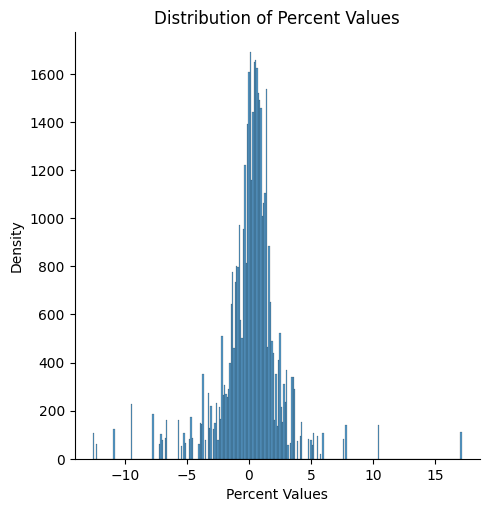

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt



# Plot the distribution
plt.figure(figsize=(10, 6))

# Using histplot to show histogram and KDE
sns.displot(news_and_price['move_percent'])

# Or use kdeplot for only KDE
# sns.kdeplot(df['percent_values'], shade=True)

# Plot customization
plt.title('Distribution of Percent Values')
plt.xlabel('Percent Values')
plt.ylabel('Density')
plt.show()

In [17]:
perc_33 =  news_and_price['move_percent'].quantile(0.33)
median = news_and_price['move_percent'].quantile(0.5)
perc_66 =  news_and_price['move_percent'].quantile(0.66)

In [18]:
print(f'The percentage movements are centered around {round(median, 4)} \n with a third of the data below {round(perc_33, 4)}\n and a third above {round(perc_66, 4)}')

The percentage movements are centered around 0.3519 
 with a third of the data below -0.2759
 and a third above 0.8501


### Create labels

In [19]:
import numpy as np

conditions = [
    (news_and_price['move_percent'] < perc_33),
    (news_and_price['move_percent'] < perc_66) & (news_and_price['move_percent'] > perc_33),
    (news_and_price['move_percent'] > perc_66)
]

values = [0,1,2]

news_and_price['label'] = np.select(conditions, values)


In [20]:
news_and_price = news_and_price.dropna()

In [21]:
news_and_price.head()

,headlines,Close,future_close,price_move,move_percent,label
Date,,,,,,
2018-03-20,Cramer Remix : Here's how Mark Zuckerberg shou...,270.950012,258.049988,-12.900024,-4.761035,0
2018-03-20,Cramer's lightning round : With so many great ...,270.950012,258.049988,-12.900024,-4.761035,0
2018-03-20,Information is 'the modern-day weapon' and we'...,270.950012,258.049988,-12.900024,-4.761035,0
2018-03-20,Cramer's charts show 'signs of life' for the s...,270.950012,258.049988,-12.900024,-4.761035,0
2018-03-20,"Cramer : Trump , the Fed and the cloud can get...",270.950012,258.049988,-12.900024,-4.761035,0


In [22]:
news_and_price['label'].value_counts()

label
2    15390
0    15082
1    14991
Name: count, dtype: int64